# Visualize geographical data on map

Geographical data can be visualized using GeoPandas https://geopandas.org and Folium https://python-visualization.github.io/folium/, which allows the interactive visualization of data on a map from OpenStreetMap https://www.openstreetmap.org.

###### Python 3.7

General packages: numpy, matplotlib

###### Installation instructions for specifically required packages

    conda install geopandas    
    pip install folium

##### Example data

Example data can be downloaded from https://data.geo.admin.ch. The specific dataset used here is  http://data.geo.admin.ch.s3.amazonaws.com/ch.swisstopo.swissboundaries3d-kanton-flaeche.fill/data.zip. 

The shape data from that source can be converted to geoson as follows:

  ogr2ogr -f GeoJSON -t_srs EPSG:4326 -simplify 1000 switzerland.geojson swissBOUNDARIES3D_1_2_TLM_KANTONSGEBIET.shp
  
The tool 'ogr2ogr' is part of the GDAL-package https://pypi.org/project/GDAL/ which is already installed as a dependency of geopandas.

#### First import all required modules

In [1]:
import folium
print (folium.__version__)

0.10.1


In [2]:
import geopandas as gpd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

## Simple map using Matplotlib and GeoPandas

In [5]:
# Read Geojson-file
df = gpd.read_file('switzerland.geojson')
print (df.columns)
df.head()

Index(['UUID', 'DATUM_AEND', 'DATUM_ERST', 'ERSTELL_J', 'ERSTELL_M',
       'REVISION_J', 'REVISION_M', 'GRUND_AEND', 'HERKUNFT', 'HERKUNFT_J',
       'HERKUNFT_M', 'OBJEKTART', 'REVISION_Q', 'ICC', 'KANTONSNUM',
       'SEE_FLAECH', 'KANTONSFLA', 'KT_TEIL', 'NAME', 'EINWOHNERZ',
       'geometry'],
      dtype='object')


,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2020,1,Verbessert,AV,2019,...,Kanton,2019_Aufbau,CH,18,NaN,710530.0,0,Graubünden,198379.0,"POLYGON Z ((8.87705 46.81292 3111.85379, 8.914..."
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2019-11-06,2012-10-26,2012,10,2020,1,Verbessert,swisstopo,2019,...,Kanton,2019_Aufbau,CH,2,11897.0,595951.0,1,Bern,1034977.0,"POLYGON Z ((8.04694 46.78712 2398.51526, 8.090..."
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2018-11-22,2012-10-26,2012,10,2020,1,Verbessert,AV,2019,...,Kanton,2019_Aufbau,CH,23,1060.0,522463.0,0,Valais,343955.0,"POLYGON Z ((8.38472 46.45216 2976.01480, 8.303..."
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2019-11-06,2012-10-26,2012,10,2020,1,Verbessert,swisstopo,2019,...,Kanton,2019_Aufbau,CH,22,39097.0,321202.0,1,Vaud,799145.0,"POLYGON Z ((7.07125 46.20101 2981.52240, 7.033..."
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2018-11-22,2012-10-26,2012,10,2020,1,Verbessert,AV,2019,...,Kanton,2019_Aufbau,CH,21,7147.0,281216.0,0,Ticino,353343.0,"POLYGON Z ((8.38472 46.45216 2976.01480, 8.392..."


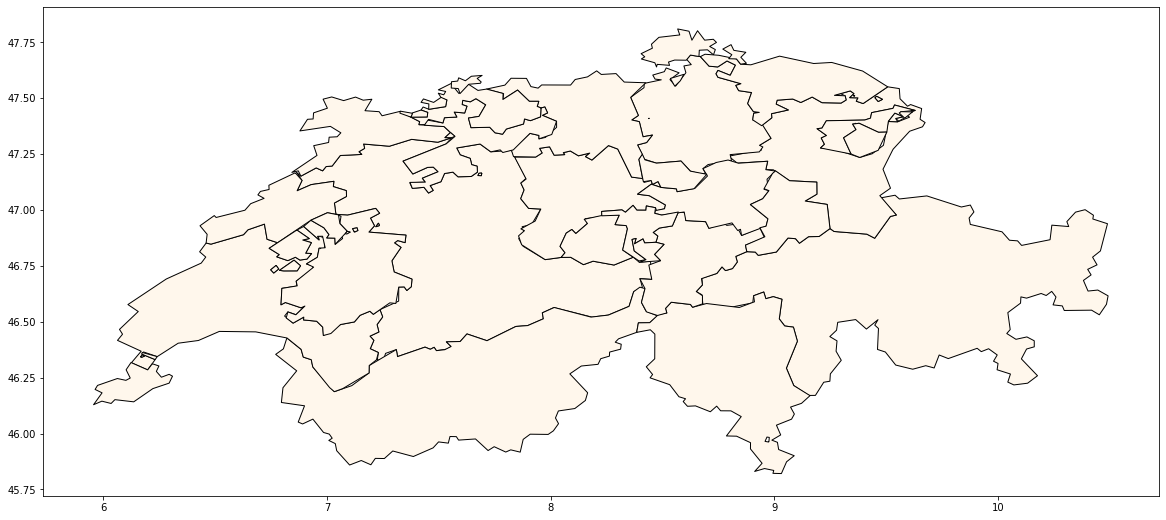

In [6]:
# basic map plot
fig, ax = plt.subplots(figsize=(20,20))
df.plot(ax=ax, column='ERSTELL_J', cmap='OrRd', edgecolor='black')

### Visualize data on simple map

/home/nplattner/miniconda/envs/GeoSearch/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


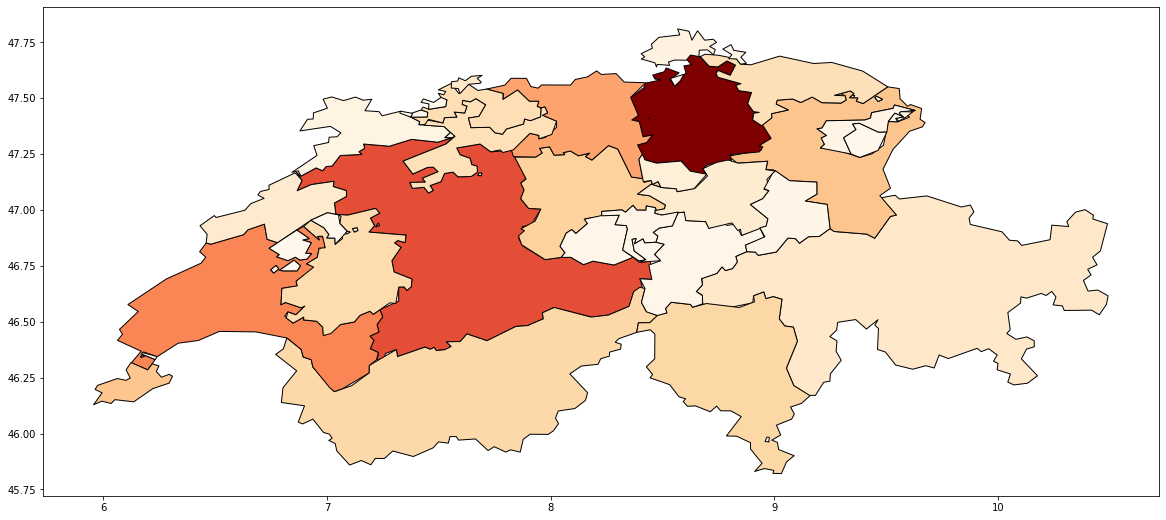

In [7]:
# basic map plot
fig, ax = plt.subplots(figsize=(20,20))
df.plot(ax=ax, column='EINWOHNERZ', cmap='OrRd', edgecolor='black')

In [8]:
# Calculate population density using data from GeoJson file
df['density'] = df.EINWOHNERZ / df.KANTONSFLA # calculate population density

/home/nplattner/miniconda/envs/GeoSearch/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


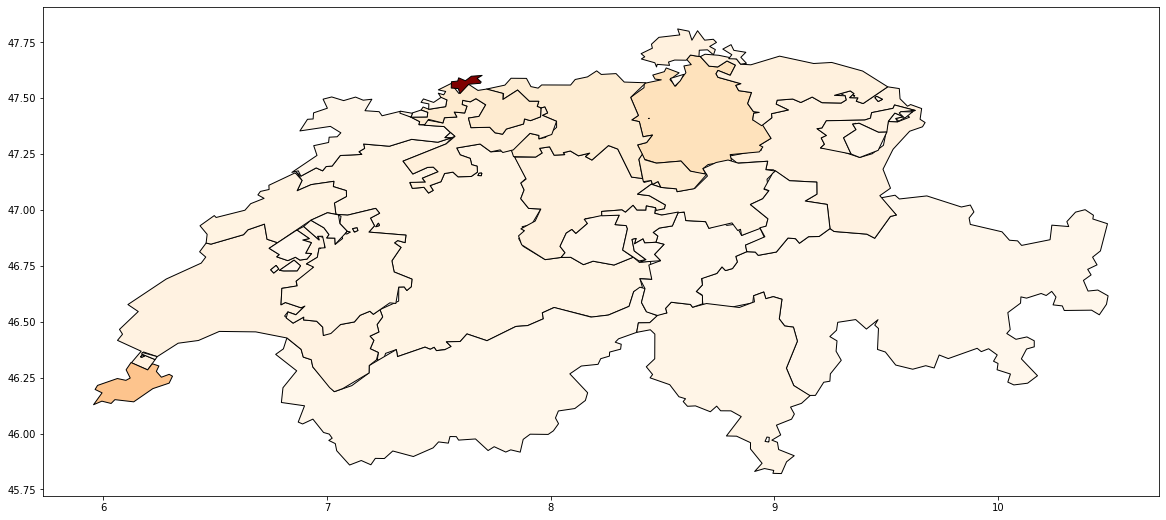

In [9]:
# Visualize population density
fig, ax = plt.subplots(figsize=(20,20))
df.plot(ax=ax, column='density', cmap='OrRd', edgecolor='black')

## Interactive map from OpenStreetMap 

First we look at the map of openstreet map and choose different centers and zoom levels

In [10]:
# World map: map centered at [0,0, Zoom=1]
kanton_map = folium.Map(location=[0,0],  zoom_start=1)
kanton_map

In [11]:
# Map of Switzerland and some neighboring countries:
kanton_map = folium.Map(location=[46.8, 8.33],  zoom_start=7)
kanton_map

In [12]:
# combine map with shape file downloaded before
kanton_map.choropleth(geo_data ='switzerland.geojson', fill_color='white')
kanton_map

/home/nplattner/miniconda/envs/GeoSearch/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Visualize data on interactive map

Visualize all peaks on canton borders above 3000 m

In [13]:
# define altitude limit
alt_lim = 3000

In [14]:
# create peak list
peaks = list()
for kanton in df.index:
    arr = np.array(df.geometry[kanton].exterior.coords)
    peaks.append(arr[np.where(arr[:,2]>alt_lim)].tolist())
peaks = [item for sublist in peaks for item in sublist] # flatten to a single list of 3d points 
print ('number of peaks found = ', len(peaks))

number of peaks found =  152


In [15]:
kanton_map2 = folium.Map(location=[46.8, 8.33], zoom_start=7.5)
feature_group = folium.FeatureGroup("Locations")
for peak in peaks:
    feature_group.add_child(folium.Marker(location=[peak[1], peak[0]], popup=str(peak[2]))) 
kanton_map2.add_child(feature_group)
kanton_map2